In [152]:
%pylab inline
import pandas as pd
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


C:\Users\jukka\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [153]:
url = r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/'
cleveData = url + r'cleveland.data'
hungarianData = url + r'hungarian.data'
switchData = url + r'switzerland.data'
cleanCleveData = url + r'processed.cleveland.data'

print(cleveData +'\n' +  hungarianData + '\n' + switchData + '\n' + cleanCleveData)

https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/hungarian.data
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/switzerland.data
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data


1. age
2. sex
3. cp = chestpain type values 1 to 4
4. trestbds = resting blood pressure in mm hg
5. chol = cholestrorol
6. fbs = fasting blood suger
7. restecg = resting electrocardiographic result 0 to 2
8. thalach = maximum heart rate achieved
9. exang = exercise induced angina 1 true 0 false
10. oldpeak = ST depression induced by exercise relative to rest
11. slope = the slope of the peak exercise ST segment 1 to 3
12. ca = number of major vessels colored by flourosopy 0-3
13. thal = 3 normal 6 fixed defect 7 reversable defect
14. num = diagnos of heart disease

In [154]:
dfCC = pd.read_csv(cleanCleveData, index_col = None, header = None, na_values = '?')
#dfCC = dfCC.rename(columns={0: "age", 1: "sex", 2: "cp", 3: "trestbds", 4: "chol", 
 #                           5: "fbs", 6: "restecg", 7: "thalach", 8: "exang", 9: "oldpeak", 
  #                          10: "slope", 11: "ca", 12: "thal", 13: "num"})

In [155]:
dfCC.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [156]:
dfCC = dfCC.interpolate()
dfCC.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [157]:
minmax_scaler = preprocessing.MinMaxScaler()
dfCC[[0, 7]] = minmax_scaler.fit_transform(dfCC[[0, 7]])
dfCC[[2, 6,10,11,12,13]] = minmax_scaler.fit_transform(dfCC[[2, 6,10,11,12,13]])

robustscaler = preprocessing.RobustScaler()
dfCC[[3,4,9]] = robustscaler.fit_transform(dfCC[[3,4,9]])
dfCC.head()

C:\Users\jukka\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.708333,1.0,0.000000,0.75,-0.125000,1.0,1.0,0.603053,0.0,0.9375,1.0,0.000000,0.75,0.00
1,0.791667,1.0,1.000000,1.50,0.703125,0.0,1.0,0.282443,1.0,0.4375,0.5,1.000000,0.00,0.50
2,0.791667,1.0,1.000000,-0.50,-0.187500,0.0,1.0,0.442748,1.0,1.1250,0.5,0.666667,1.00,0.25
3,0.166667,1.0,0.666667,0.00,0.140625,0.0,0.0,0.885496,0.0,1.6875,1.0,0.000000,0.00,0.00
4,0.250000,0.0,0.333333,0.00,-0.578125,0.0,1.0,0.770992,0.0,0.3750,0.0,0.000000,0.00,0.00


In [158]:
msk = np.random.rand(len(dfCC)) < 0.8
train = dfCC[msk]
test = dfCC[~msk]
print(str(len(train)) +'\n'+ str(len(test)))
data = train.loc[:, 0:12]
labels = 1.0*(train.loc[:, 13] > 0)

testData = test.loc[:, 0:12]
testLabels = 1.0*(test.loc[:, 13] > 0)

#making neuralnetwork 
model = Sequential()
model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=50, batch_size=26, verbose=0, validation_split = 0.2)




245
58


58/58 [==============================] - 0s 103us/sample - loss: 0.1320 - mean_absolute_error: 0.2762


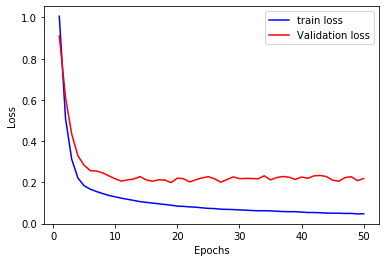

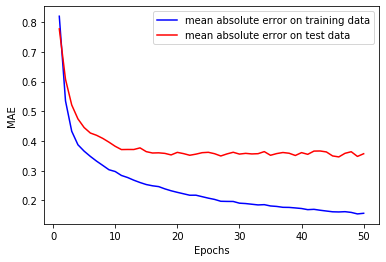

In [159]:
#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="train loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")

plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on test data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

In [160]:
model = Sequential()
model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=7, batch_size=26, verbose=0, validation_split = 0.2)



58/58 [==============================] - 0s 211us/sample - loss: 0.1440 - mean_absolute_error: 0.2830


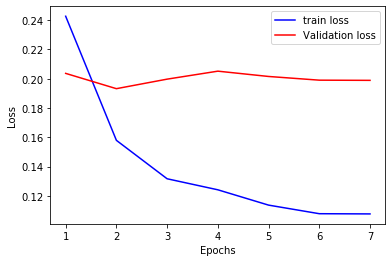

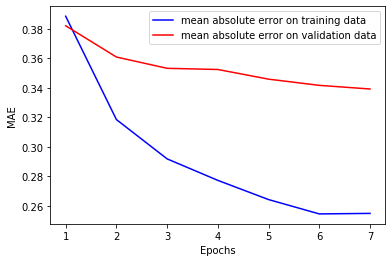

In [161]:
#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="train loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

58/58 [==============================] - 0s 0s/sample - loss: 0.1456 - mean_absolute_error: 0.2996


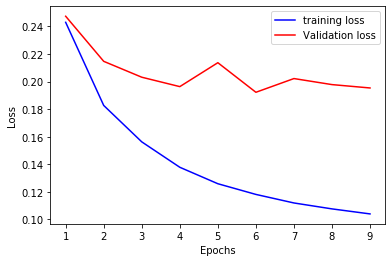

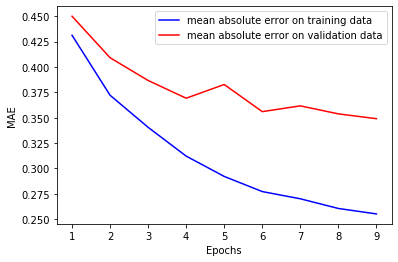

In [162]:
model = Sequential()
model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=9, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

58/58 [==============================] - 0s 0s/sample - loss: 0.1515 - mean_absolute_error: 0.2956


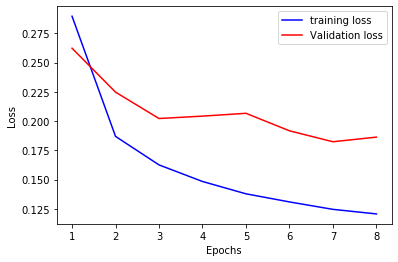

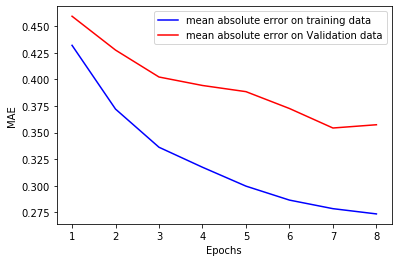

In [163]:
model = Sequential()
model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=8, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on Validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

58/58 [==============================] - 0s 68us/sample - loss: 0.1132 - mean_absolute_error: 0.2709


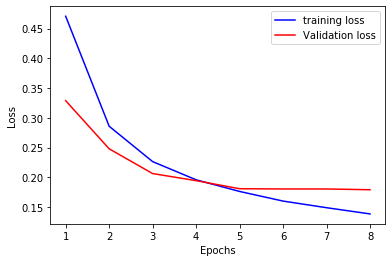

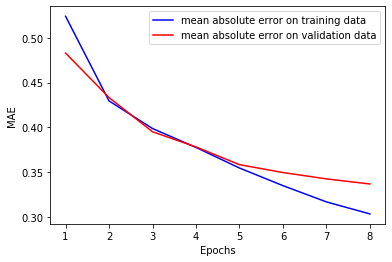

In [164]:
#testing taking one layer off
model = Sequential()
model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=8, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()#

58/58 [==============================] - 0s 269us/sample - loss: 0.2157 - mean_absolute_error: 0.4518


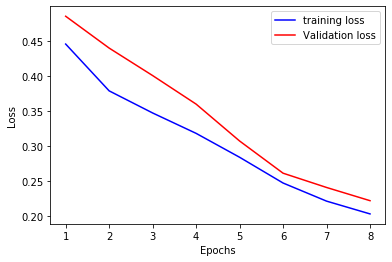

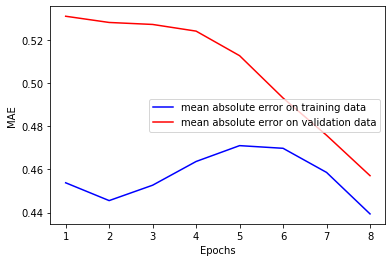

In [165]:
model.add(Dense(29, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=8, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

58/58 [==============================] - 0s 0s/sample - loss: 0.1449 - mean_absolute_error: 0.2784


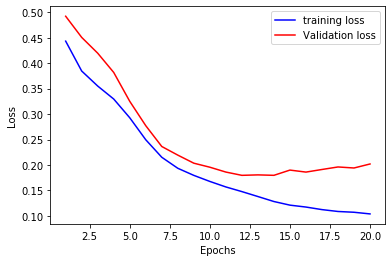

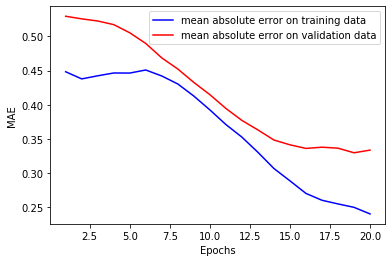

In [166]:
model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=20, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

58/58 [==============================] - 0s 0s/sample - loss: 0.1564 - mean_absolute_error: 0.2832


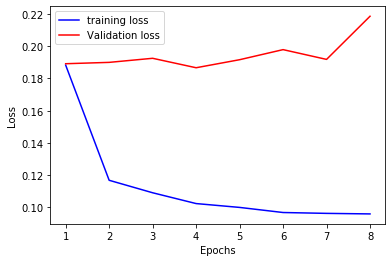

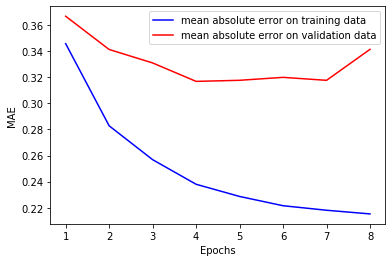

In [167]:
model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=8, batch_size=13, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

58/58 [==============================] - 0s 137us/sample - loss: 0.1378 - mean_absolute_error: 0.2821


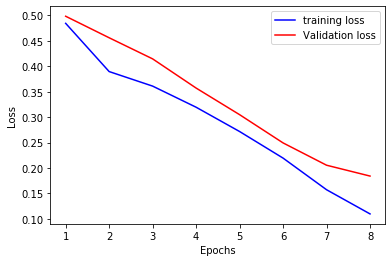

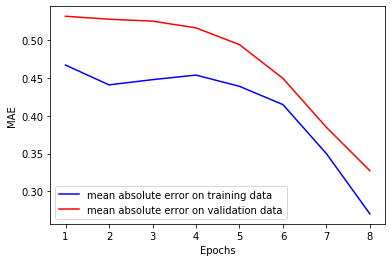

In [168]:
model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=8, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

58/58 [==============================] - 0s 120us/sample - loss: 0.2563 - mean_absolute_error: 0.5000


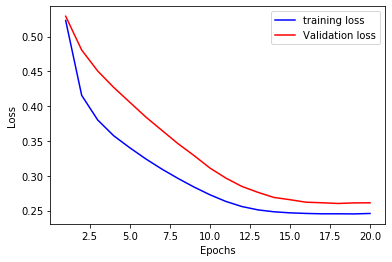

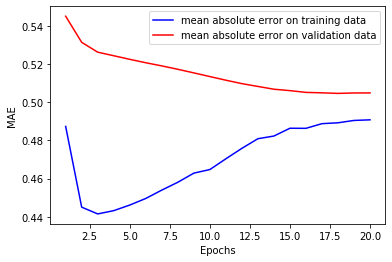

In [169]:
model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

58/58 [==============================] - 0s 0s/sample - loss: 0.1861 - mean_absolute_error: 0.4012


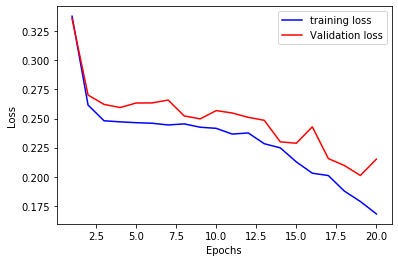

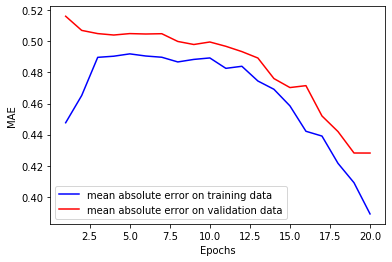

In [170]:
model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(15))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

58/58 [==============================] - 0s 269us/sample - loss: 0.1472 - mean_absolute_error: 0.2857


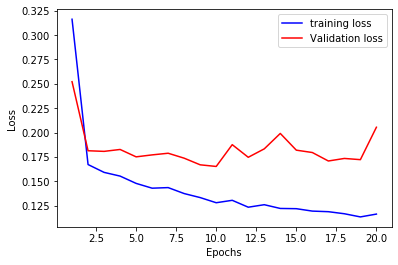

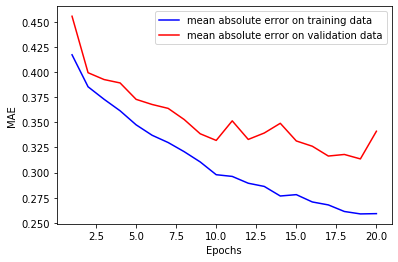

In [171]:
model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(15,activation = 'relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

58/58 [==============================] - 0s 0s/sample - loss: 0.1325 - mean_absolute_error: 0.2638


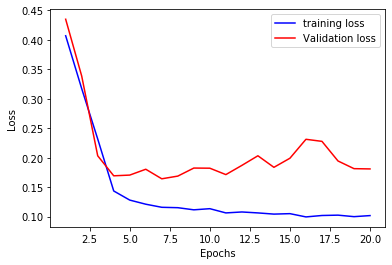

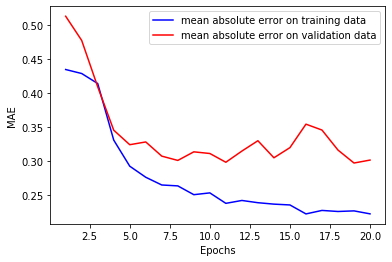

In [172]:
model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(30,activation = 'relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

58/58 [==============================] - 0s 0s/sample - loss: 0.1386 - mean_absolute_error: 0.2607


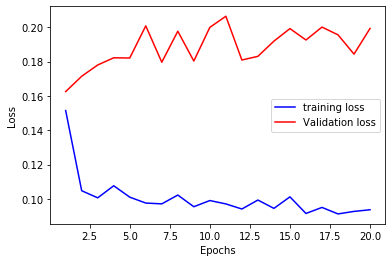

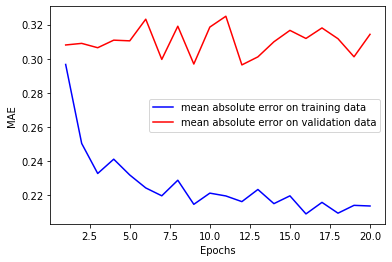

In [173]:
model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(10,activation = 'relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

58/58 [==============================] - 0s 104us/sample - loss: 0.1397 - mean_absolute_error: 0.2580


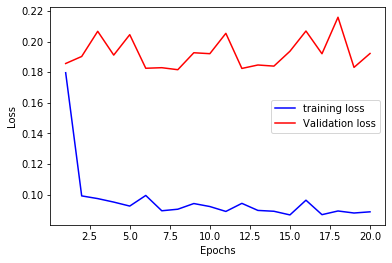

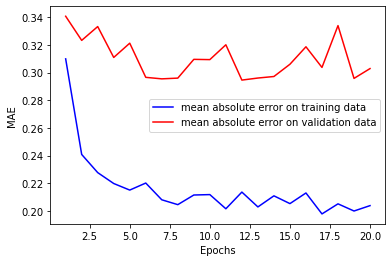

In [174]:
model.add(Dense(25, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(10,activation = 'relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

58/58 [==============================] - 0s 0s/sample - loss: 0.1467 - mean_absolute_error: 0.2665


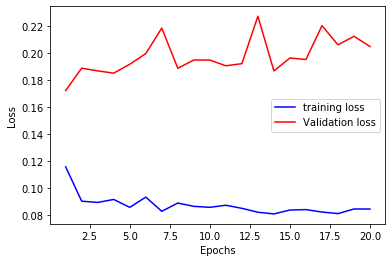

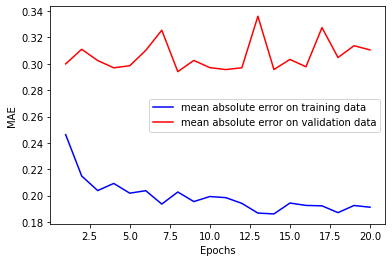

In [175]:
model.add(Dense(10, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(10,activation = 'relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

58/58 [==============================] - 0s 0s/sample - loss: 0.2085 - mean_absolute_error: 0.3947


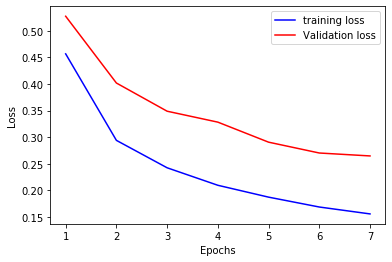

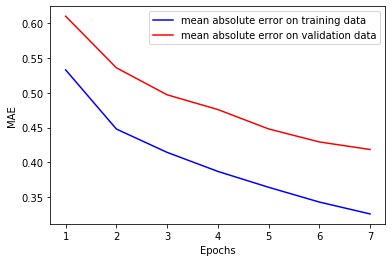

In [179]:
#best model after looking some time
model = Sequential()
model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(data, labels, epochs=7, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()#